In [51]:
import pandas as pd
import numpy as np

### By using `read_csv(engine, encoding)`, solving the utf-8 error, and reading the file correctly. 
reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [52]:
air_2015 = pd.read_csv('Beijing_2015_HourlyPM25_created20160201.csv', skiprows=3, engine ='python', encoding = 'latin_1', parse_dates=[2])
air_2015.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2015-01-01 00:00:00,2015,1,1,0,22,µg/m³,1 Hr,Valid
1,Beijing,PM2.5,2015-01-01 01:00:00,2015,1,1,1,9,µg/m³,1 Hr,Valid
2,Beijing,PM2.5,2015-01-01 02:00:00,2015,1,1,2,9,µg/m³,1 Hr,Valid
3,Beijing,PM2.5,2015-01-01 03:00:00,2015,1,1,3,13,µg/m³,1 Hr,Valid
4,Beijing,PM2.5,2015-01-01 04:00:00,2015,1,1,4,10,µg/m³,1 Hr,Valid


In [3]:
air_2015.tail()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
8755,Beijing,PM2.5,2015-12-31 19:00:00,2015,12,31,19,133,µg/m³,1 Hr,Valid
8756,Beijing,PM2.5,2015-12-31 20:00:00,2015,12,31,20,169,µg/m³,1 Hr,Valid
8757,Beijing,PM2.5,2015-12-31 21:00:00,2015,12,31,21,203,µg/m³,1 Hr,Valid
8758,Beijing,PM2.5,2015-12-31 22:00:00,2015,12,31,22,212,µg/m³,1 Hr,Valid
8759,Beijing,PM2.5,2015-12-31 23:00:00,2015,12,31,23,235,µg/m³,1 Hr,Valid


In [4]:
air_2015.index

RangeIndex(start=0, stop=8760, step=1)

In [5]:
air_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Site        8760 non-null   object        
 1   Parameter   8760 non-null   object        
 2   Date (LST)  8760 non-null   datetime64[ns]
 3   Year        8760 non-null   int64         
 4   Month       8760 non-null   int64         
 5   Day         8760 non-null   int64         
 6   Hour        8760 non-null   int64         
 7   Value       8760 non-null   int64         
 8   Unit        8760 non-null   object        
 9   Duration    8760 non-null   object        
 10  QC Name     8760 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 752.9+ KB


In [6]:
air_2015.columns

Index(['Site', 'Parameter', 'Date (LST)', 'Year', 'Month', 'Day', 'Hour',
       'Value', 'Unit', 'Duration', 'QC Name'],
      dtype='object')

### Looking for the missing data. According to *the U.S. Department of State air quality files*, Missing values are listed as -999 but not null. In this case, we can't filter boolean by using 'dropna( )'.

In [7]:
air_2015_filtered = air_2015[air_2015['Value'] == -999]

In [8]:
air_2015_filtered

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
346,Beijing,PM2.5,2015-01-15 10:00:00,2015,1,15,10,-999,µg/m³,1 Hr,Missing
589,Beijing,PM2.5,2015-01-25 13:00:00,2015,1,25,13,-999,µg/m³,1 Hr,Missing
735,Beijing,PM2.5,2015-01-31 15:00:00,2015,1,31,15,-999,µg/m³,1 Hr,Missing
736,Beijing,PM2.5,2015-01-31 16:00:00,2015,1,31,16,-999,µg/m³,1 Hr,Missing
737,Beijing,PM2.5,2015-01-31 17:00:00,2015,1,31,17,-999,µg/m³,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...
8465,Beijing,PM2.5,2015-12-19 17:00:00,2015,12,19,17,-999,µg/m³,1 Hr,Missing
8466,Beijing,PM2.5,2015-12-19 18:00:00,2015,12,19,18,-999,µg/m³,1 Hr,Missing
8467,Beijing,PM2.5,2015-12-19 19:00:00,2015,12,19,19,-999,µg/m³,1 Hr,Missing
8468,Beijing,PM2.5,2015-12-19 20:00:00,2015,12,19,20,-999,µg/m³,1 Hr,Missing


### Data cleaning. By using `drop( )`, removing the rows with missing data.

In [9]:
air_2015 = air_2015.drop(air_2015.loc[air_2015['Value'] == -999].index)
air_2015

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2015-01-01 00:00:00,2015,1,1,0,22,µg/m³,1 Hr,Valid
1,Beijing,PM2.5,2015-01-01 01:00:00,2015,1,1,1,9,µg/m³,1 Hr,Valid
2,Beijing,PM2.5,2015-01-01 02:00:00,2015,1,1,2,9,µg/m³,1 Hr,Valid
3,Beijing,PM2.5,2015-01-01 03:00:00,2015,1,1,3,13,µg/m³,1 Hr,Valid
4,Beijing,PM2.5,2015-01-01 04:00:00,2015,1,1,4,10,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8755,Beijing,PM2.5,2015-12-31 19:00:00,2015,12,31,19,133,µg/m³,1 Hr,Valid
8756,Beijing,PM2.5,2015-12-31 20:00:00,2015,12,31,20,169,µg/m³,1 Hr,Valid
8757,Beijing,PM2.5,2015-12-31 21:00:00,2015,12,31,21,203,µg/m³,1 Hr,Valid
8758,Beijing,PM2.5,2015-12-31 22:00:00,2015,12,31,22,212,µg/m³,1 Hr,Valid


In [10]:
air_2015.Value.max()

722

In [11]:
air_2015.Value.mean()

82.64825279667858

In [12]:
air_2015.Value.median()

54.0

### To get the first sense of how air quality looks like in Beijing, 2015, from 00:00 Jan 1st to 23:59 Dec 31.

<AxesSubplot:>

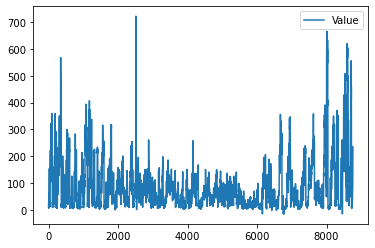

In [13]:
air_2015.plot(y='Value')

In [14]:
midnight=air_2015[air_2015['Hour'] == 0]

In [15]:
midnight

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2015-01-01,2015,1,1,0,22,µg/m³,1 Hr,Valid
24,Beijing,PM2.5,2015-01-02,2015,1,2,0,126,µg/m³,1 Hr,Valid
48,Beijing,PM2.5,2015-01-03,2015,1,3,0,163,µg/m³,1 Hr,Valid
72,Beijing,PM2.5,2015-01-04,2015,1,4,0,272,µg/m³,1 Hr,Valid
96,Beijing,PM2.5,2015-01-05,2015,1,5,0,171,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8640,Beijing,PM2.5,2015-12-27,2015,12,27,0,32,µg/m³,1 Hr,Valid
8664,Beijing,PM2.5,2015-12-28,2015,12,28,0,120,µg/m³,1 Hr,Valid
8688,Beijing,PM2.5,2015-12-29,2015,12,29,0,294,µg/m³,1 Hr,Valid
8712,Beijing,PM2.5,2015-12-30,2015,12,30,0,536,µg/m³,1 Hr,Valid


In [16]:
midday = air_2015[air_2015['Hour'] == 12]
midday

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
12,Beijing,PM2.5,2015-01-01 12:00:00,2015,1,1,12,63,µg/m³,1 Hr,Valid
36,Beijing,PM2.5,2015-01-02 12:00:00,2015,1,2,12,19,µg/m³,1 Hr,Valid
60,Beijing,PM2.5,2015-01-03 12:00:00,2015,1,3,12,170,µg/m³,1 Hr,Valid
84,Beijing,PM2.5,2015-01-04 12:00:00,2015,1,4,12,112,µg/m³,1 Hr,Valid
108,Beijing,PM2.5,2015-01-05 12:00:00,2015,1,5,12,36,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8652,Beijing,PM2.5,2015-12-27 12:00:00,2015,12,27,12,56,µg/m³,1 Hr,Valid
8676,Beijing,PM2.5,2015-12-28 12:00:00,2015,12,28,12,64,µg/m³,1 Hr,Valid
8700,Beijing,PM2.5,2015-12-29 12:00:00,2015,12,29,12,236,µg/m³,1 Hr,Valid
8724,Beijing,PM2.5,2015-12-30 12:00:00,2015,12,30,12,9,µg/m³,1 Hr,Valid


### I have a hypothesis, due to the actitivities during the daytime, air quality in the day is  worse than it in the night.

<AxesSubplot:>

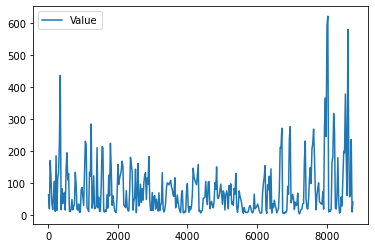

In [17]:
midday.plot(y='Value')

<AxesSubplot:>

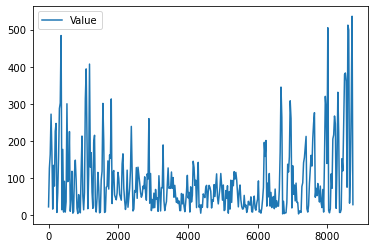

In [18]:
midnight.plot(y='Value')

In [19]:
midnight[~midnight.index.isin(midday.index)]

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2015-01-01,2015,1,1,0,22,µg/m³,1 Hr,Valid
24,Beijing,PM2.5,2015-01-02,2015,1,2,0,126,µg/m³,1 Hr,Valid
48,Beijing,PM2.5,2015-01-03,2015,1,3,0,163,µg/m³,1 Hr,Valid
72,Beijing,PM2.5,2015-01-04,2015,1,4,0,272,µg/m³,1 Hr,Valid
96,Beijing,PM2.5,2015-01-05,2015,1,5,0,171,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8640,Beijing,PM2.5,2015-12-27,2015,12,27,0,32,µg/m³,1 Hr,Valid
8664,Beijing,PM2.5,2015-12-28,2015,12,28,0,120,µg/m³,1 Hr,Valid
8688,Beijing,PM2.5,2015-12-29,2015,12,29,0,294,µg/m³,1 Hr,Valid
8712,Beijing,PM2.5,2015-12-30,2015,12,30,0,536,µg/m³,1 Hr,Valid


### However, due to missing rows in the 'midday', I couldn't plot the two datesets in one figure successfully.

Text(0, 0.5, 'PM 2.5')

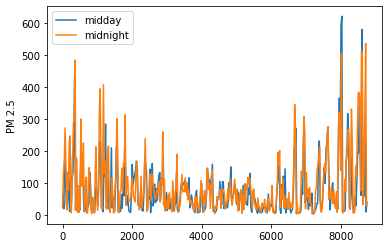

In [20]:
ax = midday.plot(y="Value", label="midday")
midnight.plot(y="Value",label="midnight",ax=ax)
ax.set_ylabel("PM 2.5")

### I assume the air quality on Chinese new year eve is more likely worse than new year eve, due to the cultural bond.

In [21]:
new_year_eve = air_2015[((air_2015['Month']==12) & (air_2015['Day']==31))]
new_year_eve.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
8736,Beijing,PM2.5,2015-12-31 00:00:00,2015,12,31,0,28,µg/m³,1 Hr,Valid
8737,Beijing,PM2.5,2015-12-31 01:00:00,2015,12,31,1,27,µg/m³,1 Hr,Valid
8738,Beijing,PM2.5,2015-12-31 02:00:00,2015,12,31,2,24,µg/m³,1 Hr,Valid
8739,Beijing,PM2.5,2015-12-31 03:00:00,2015,12,31,3,23,µg/m³,1 Hr,Valid
8740,Beijing,PM2.5,2015-12-31 04:00:00,2015,12,31,4,19,µg/m³,1 Hr,Valid


In [22]:
new_year_eve.describe()

,Year,Month,Day,Hour,Value
count,24.0,24.0,24.0,24.000000,24.000000
mean,2015.0,12.0,31.0,11.500000,70.875000
std,0.0,0.0,0.0,7.071068,68.934949
min,2015.0,12.0,31.0,0.000000,14.000000
25%,2015.0,12.0,31.0,5.750000,24.750000
50%,2015.0,12.0,31.0,11.500000,35.500000
75%,2015.0,12.0,31.0,17.250000,96.750000
max,2015.0,12.0,31.0,23.000000,235.000000


<AxesSubplot:xlabel='Hour'>

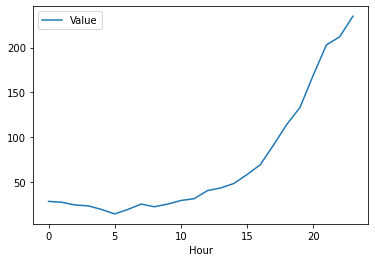

In [23]:
new_year_eve.plot(x='Hour', y='Value')

Chinese new year is Feb 19

In [24]:
chinese_new_year_eve = air_2015[((air_2015['Month']==2) & (air_2015['Day']==18))]
chinese_new_year_eve.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
1152,Beijing,PM2.5,2015-02-18 00:00:00,2015,2,18,0,109,µg/m³,1 Hr,Valid
1153,Beijing,PM2.5,2015-02-18 01:00:00,2015,2,18,1,79,µg/m³,1 Hr,Valid
1154,Beijing,PM2.5,2015-02-18 02:00:00,2015,2,18,2,29,µg/m³,1 Hr,Valid
1155,Beijing,PM2.5,2015-02-18 03:00:00,2015,2,18,3,21,µg/m³,1 Hr,Valid
1156,Beijing,PM2.5,2015-02-18 04:00:00,2015,2,18,4,16,µg/m³,1 Hr,Valid


In [25]:
chinese_new_year_eve.describe()

,Year,Month,Day,Hour,Value
count,24.0,24.0,24.0,24.000000,24.000000
mean,2015.0,2.0,18.0,11.500000,47.416667
std,0.0,0.0,0.0,7.071068,55.345489
min,2015.0,2.0,18.0,0.000000,9.000000
25%,2015.0,2.0,18.0,5.750000,12.750000
50%,2015.0,2.0,18.0,11.500000,16.000000
75%,2015.0,2.0,18.0,17.250000,76.750000
max,2015.0,2.0,18.0,23.000000,176.000000


<AxesSubplot:xlabel='Hour'>

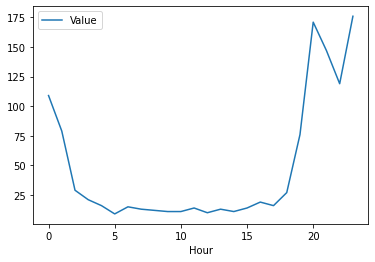

In [26]:
chinese_new_year_eve.plot(x ='Hour', y='Value')

Text(0, 0.5, 'PM 2.5')

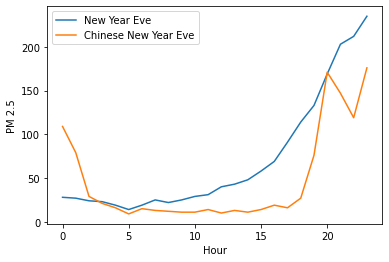

In [27]:
ax = new_year_eve.plot(x="Hour", y="Value", label="New Year Eve")
chinese_new_year_eve.plot(x="Hour",y="Value",label="Chinese New Year Eve",ax=ax)
ax.set_ylabel("PM 2.5")

*Next step:* Compare the two different new year's eves with an average day (calculated hour by hour).

### To compare to normal days, I need to find the average index of every hour.

In [28]:
hourly_average = air_2015[['Hour','Value']].groupby(['Hour']).mean().reset_index()
hourly_average

,Hour,Value
0,0,91.703297
1,1,91.942149
2,2,90.745856
3,3,87.362637
4,4,82.597796
5,5,81.512397
6,6,80.212121
7,7,80.443213
8,8,78.958333
9,9,79.527778


Text(0, 0.5, 'PM 2.5')

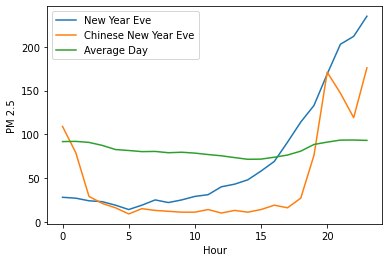

In [29]:
ax = new_year_eve.plot(x="Hour", y="Value", label="New Year Eve")
chinese_new_year_eve.plot(x="Hour",y="Value",label="Chinese New Year Eve",ax=ax)
hourly_average.plot(x='Hour',y='Value',label="Average Day", ax=ax)
ax.set_ylabel("PM 2.5")

### I also want to know in which month/months, Beijingers have better air.

In [30]:
month_average = air_2015[['Month','Value']].groupby(['Month']).mean().reset_index()
month_average

,Month,Value
0,1,107.914750
1,2,96.737237
2,3,89.274895
3,4,78.855134
4,5,60.128378
5,6,54.397436
6,7,55.083558
7,8,44.647376
8,9,46.848611
9,10,72.374324


In [31]:
list(month_average['Month'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

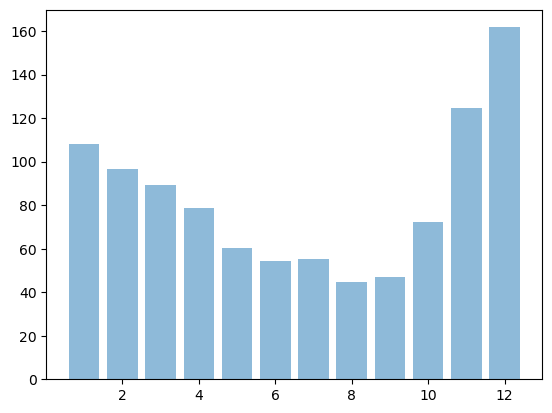

In [33]:
plt.bar(list(month_average['Month']), list(month_average['Value']), align='center',alpha=0.5)

In [34]:
from datetime import date
month_names = [date(2015,m,1).strftime('%b') for m in list(month_average['Month'])]
month_names

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

<BarContainer object of 12 artists>

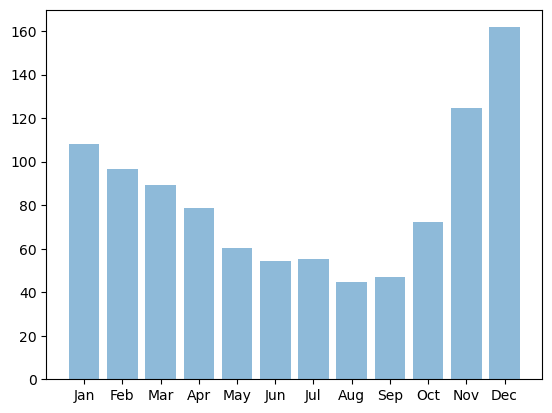

In [35]:
plt.bar(month_names, list(month_average['Value']), align='center',alpha=0.5)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

[Text(0.5, 1.0, 'How Often'), Text(0, 0.5, 'Frequency')]

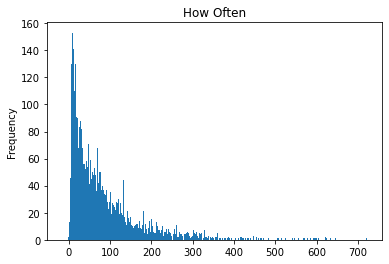

In [37]:
plt.hist(air_2015['Value'],bins=722)
plt.gca().set(title="How Often", ylabel = 'Frequency')

In [38]:
good_2015 = air_2015.loc[(air_2015['Value'] >= 0) & (air_2015['Value'] <= 50)]
good_2015.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2015-01-01 00:00:00,2015,1,1,0,22,µg/m³,1 Hr,Valid
1,Beijing,PM2.5,2015-01-01 01:00:00,2015,1,1,1,9,µg/m³,1 Hr,Valid
2,Beijing,PM2.5,2015-01-01 02:00:00,2015,1,1,2,9,µg/m³,1 Hr,Valid
3,Beijing,PM2.5,2015-01-01 03:00:00,2015,1,1,3,13,µg/m³,1 Hr,Valid
4,Beijing,PM2.5,2015-01-01 04:00:00,2015,1,1,4,10,µg/m³,1 Hr,Valid


In [39]:
moderate_2015= air_2015.loc[(air_2015['Value'] >= 51) & (air_2015['Value'] <= 100)]
moderate_2015.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
12,Beijing,PM2.5,2015-01-01 12:00:00,2015,1,1,12,63,µg/m³,1 Hr,Valid
13,Beijing,PM2.5,2015-01-01 13:00:00,2015,1,1,13,62,µg/m³,1 Hr,Valid
16,Beijing,PM2.5,2015-01-01 16:00:00,2015,1,1,16,51,µg/m³,1 Hr,Valid
17,Beijing,PM2.5,2015-01-01 17:00:00,2015,1,1,17,82,µg/m³,1 Hr,Valid
18,Beijing,PM2.5,2015-01-01 18:00:00,2015,1,1,18,87,µg/m³,1 Hr,Valid


In [40]:
unhealthy_sensitive_2015= air_2015.loc[(air_2015['Value'] >= 101) & (air_2015['Value'] <= 150)]
unhealthy_sensitive_2015.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
19,Beijing,PM2.5,2015-01-01 19:00:00,2015,1,1,19,106,µg/m³,1 Hr,Valid
20,Beijing,PM2.5,2015-01-01 20:00:00,2015,1,1,20,123,µg/m³,1 Hr,Valid
21,Beijing,PM2.5,2015-01-01 21:00:00,2015,1,1,21,136,µg/m³,1 Hr,Valid
22,Beijing,PM2.5,2015-01-01 22:00:00,2015,1,1,22,139,µg/m³,1 Hr,Valid
24,Beijing,PM2.5,2015-01-02 00:00:00,2015,1,2,0,126,µg/m³,1 Hr,Valid


In [41]:
unhealthy_2015= air_2015.loc[(air_2015['Value'] >= 151) & (air_2015['Value'] <= 200)]
unhealthy_2015.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
23,Beijing,PM2.5,2015-01-01 23:00:00,2015,1,1,23,154,µg/m³,1 Hr,Valid
47,Beijing,PM2.5,2015-01-02 23:00:00,2015,1,2,23,157,µg/m³,1 Hr,Valid
48,Beijing,PM2.5,2015-01-03 00:00:00,2015,1,3,0,163,µg/m³,1 Hr,Valid
49,Beijing,PM2.5,2015-01-03 01:00:00,2015,1,3,1,176,µg/m³,1 Hr,Valid
50,Beijing,PM2.5,2015-01-03 02:00:00,2015,1,3,2,193,µg/m³,1 Hr,Valid


In [42]:
very_unhealthy_2015= air_2015.loc[(air_2015['Value'] >= 201) & (air_2015['Value'] <= 300)]
very_unhealthy_2015.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
52,Beijing,PM2.5,2015-01-03 04:00:00,2015,1,3,4,214,µg/m³,1 Hr,Valid
53,Beijing,PM2.5,2015-01-03 05:00:00,2015,1,3,5,222,µg/m³,1 Hr,Valid
54,Beijing,PM2.5,2015-01-03 06:00:00,2015,1,3,6,209,µg/m³,1 Hr,Valid
55,Beijing,PM2.5,2015-01-03 07:00:00,2015,1,3,7,201,µg/m³,1 Hr,Valid
65,Beijing,PM2.5,2015-01-03 17:00:00,2015,1,3,17,214,µg/m³,1 Hr,Valid


In [43]:
hazardous_2015=air_2015.loc[air_2015['Value']>301]
hazardous_2015.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
69,Beijing,PM2.5,2015-01-03 21:00:00,2015,1,3,21,305,µg/m³,1 Hr,Valid
71,Beijing,PM2.5,2015-01-03 23:00:00,2015,1,3,23,322,µg/m³,1 Hr,Valid
91,Beijing,PM2.5,2015-01-04 19:00:00,2015,1,4,19,305,µg/m³,1 Hr,Valid
92,Beijing,PM2.5,2015-01-04 20:00:00,2015,1,4,20,360,µg/m³,1 Hr,Valid
94,Beijing,PM2.5,2015-01-04 22:00:00,2015,1,4,22,321,µg/m³,1 Hr,Valid


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib inline

Text(0, 0.5, 'PM 2.5')

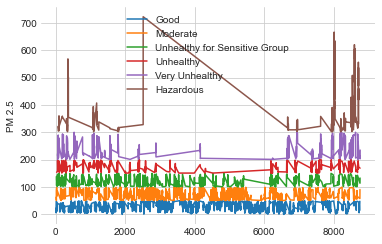

In [45]:
fig, figsize =(24,8)
ax = good_2015.plot(y="Value", label="Good")
moderate_2015.plot(y="Value",label="Moderate",ax=ax)
unhealthy_sensitive_2015.plot(y='Value',label="Unhealthy for Sensitive Group", ax=ax)
unhealthy_2015.plot(y='Value',label="Unhealthy", ax=ax)
very_unhealthy_2015.plot(y='Value',label="Very Unhealthy", ax=ax)
hazardous_2015.plot(y='Value',label="Hazardous", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_title("")
ax.set_ylabel("PM 2.5")

Text(0, 0.5, 'PM 2.5')

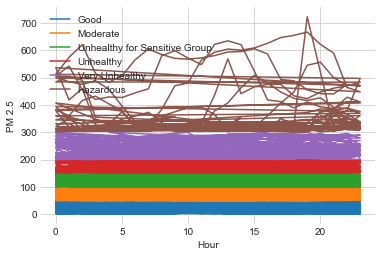

In [46]:
fig, figsize =(24,8)
ax = good_2015.plot(x='Hour',y="Value", label="Good")
moderate_2015.plot(x='Hour',y="Value",label="Moderate",ax=ax)
unhealthy_sensitive_2015.plot(x='Hour',y='Value',label="Unhealthy for Sensitive Group", ax=ax)
unhealthy_2015.plot(x='Hour',y='Value',label="Unhealthy", ax=ax)
very_unhealthy_2015.plot(x='Hour',y='Value',label="Very Unhealthy", ax=ax)
hazardous_2015.plot(x='Hour',y='Value',label="Hazardous", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_title("")
ax.set_ylabel("PM 2.5")

Text(0, 0.5, 'PM 2.5')

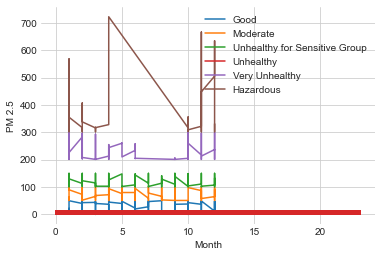

In [47]:
fig, figsize =(2,8)
ax = good_2015.plot(x="Month", y="Value", label="Good")
moderate_2015.plot(x="Month",y="Value",label="Moderate",ax=ax)
unhealthy_sensitive_2015.plot(x='Month',y='Value',label="Unhealthy for Sensitive Group", ax=ax)
unhealthy_2015.plot(x='Hour',y='Month',label="Unhealthy", ax=ax)
very_unhealthy_2015.plot(x='Month',y='Value',label="Very Unhealthy", ax=ax)
hazardous_2015.plot(x='Month',y='Value',label="Hazardous", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_title("")
ax.set_ylabel("PM 2.5")

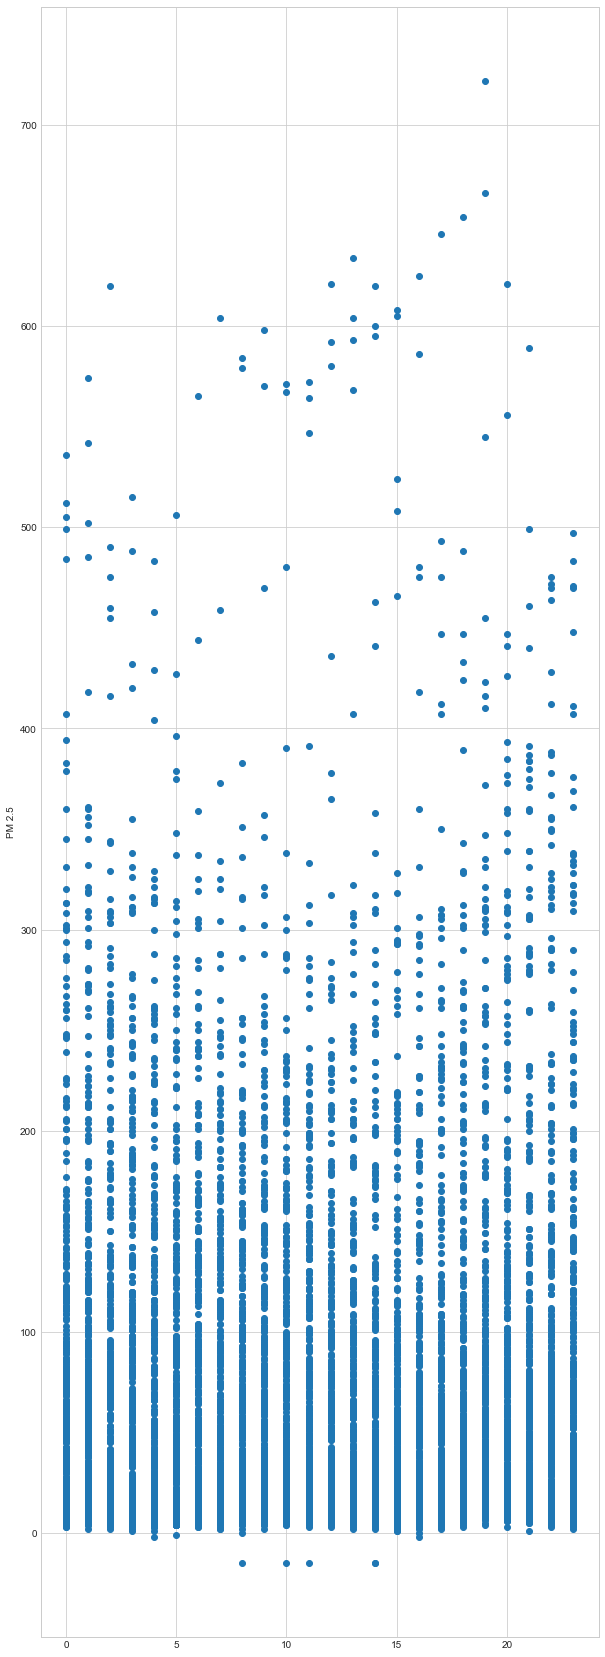

In [48]:
fig, ax= plt.subplots(figsize = (10,30))
ax.scatter(x=air_2015['Hour'],y=air_2015['Value'])
plt.ylabel("PM 2.5")
plt.show()

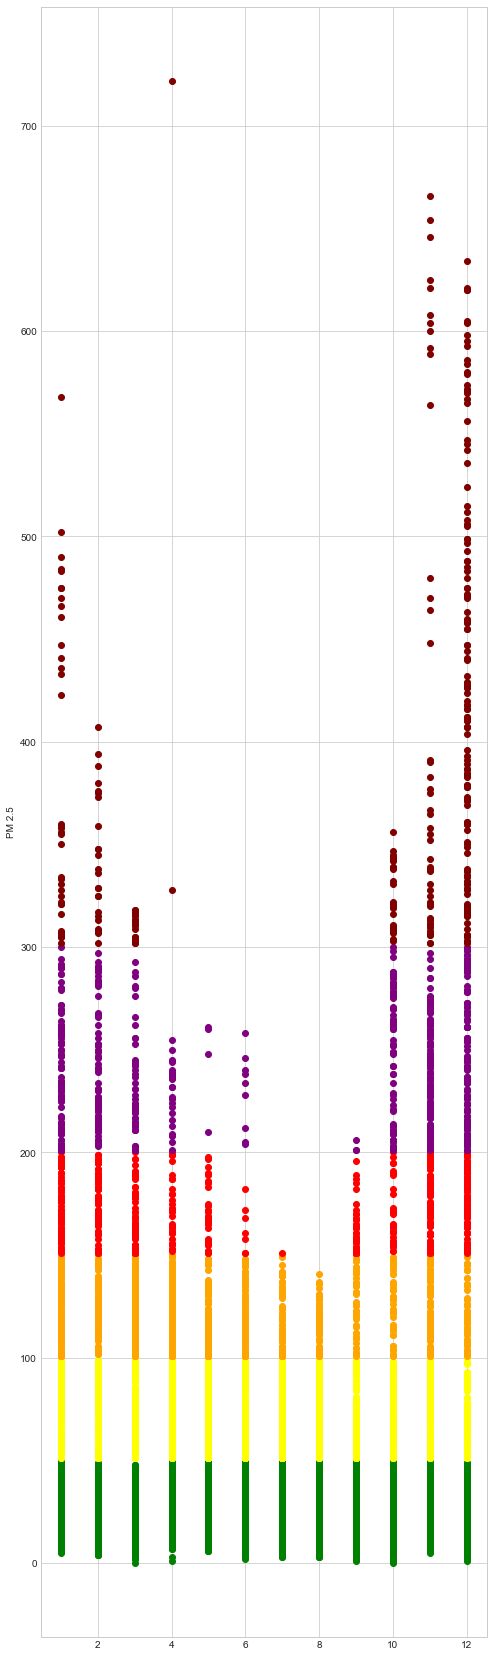

In [49]:
fig, ax= plt.subplots(figsize = (8,30))
plt.scatter(x=good_2015['Month'],y=good_2015['Value'], color ='green', label='Good')
plt.scatter(x=moderate_2015['Month'],y=moderate_2015['Value'], color ='yellow', label='Moderate')
plt.scatter(x=unhealthy_sensitive_2015['Month'],y=unhealthy_sensitive_2015['Value'], color ='orange', label='Unhealthy for Sensitive Group')
plt.scatter(x=unhealthy_2015['Month'],y=unhealthy_2015['Value'], color ='red', label='Unhealthy')
plt.scatter(x=very_unhealthy_2015['Month'],y=very_unhealthy_2015['Value'], color ='purple', label='Very Unhealthy')
plt.scatter(x=hazardous_2015['Month'],y=hazardous_2015['Value'], color ='maroon', label='Hazardous')
plt.ylabel("PM 2.5")
plt.show()

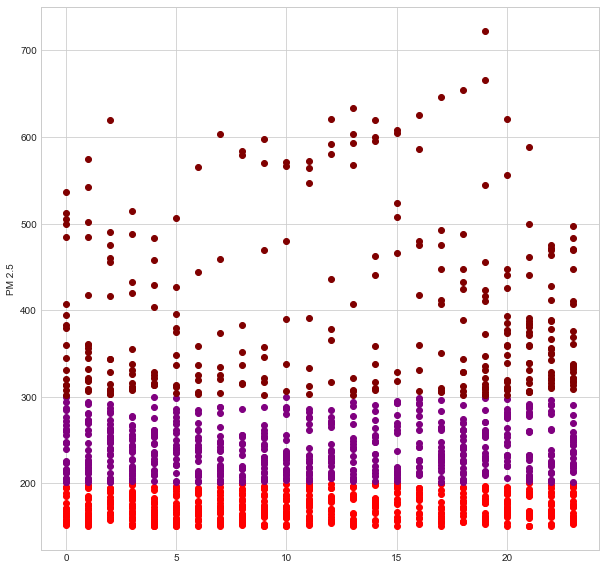

In [50]:
fig, ax= plt.subplots(figsize = (10,10))
#plt.scatter(x=good_2015['Hour'],y=good_2015['Value'], color ='green', label='Good')
#plt.scatter(x=moderate_2015['Hour'],y=moderate_2015['Value'], color ='yellow', label='Moderate')
#plt.scatter(x=unhealthy_sensitive_2015['Hour'],y=unhealthy_sensitive_2015['Value'], color ='orange', label='Unhealthy for Sensitive Group')
plt.scatter(x=unhealthy_2015['Hour'],y=unhealthy_2015['Value'], color ='red', label='Unhealthy')
plt.scatter(x=very_unhealthy_2015['Hour'],y=very_unhealthy_2015['Value'], color ='purple', label='Very Unhealthy')
plt.scatter(x=hazardous_2015['Hour'],y=hazardous_2015['Value'], color ='maroon', label='Hazardous')
plt.ylabel("PM 2.5")
plt.show()